Epoch 1/20
25/25 [==============================] - 1s 6ms/step - loss: 0.6006 - accuracy: 0.7038 - val_loss: 0.5390 - val_accuracy: 0.7900
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4523 - accuracy: 0.8438 - val_loss: 0.4445 - val_accuracy: 0.8300
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3700 - accuracy: 0.8600 - val_loss: 0.3952 - val_accuracy: 0.8600
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3236 - accuracy: 0.8863 - val_loss: 0.3709 - val_accuracy: 0.8700
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.2962 - accuracy: 0.8938 - val_loss: 0.3599 - val_accuracy: 0.8850
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.2781 - accuracy: 0.8950 - val_loss: 0.3512 - val_accuracy: 0.8900
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.2666 - accuracy: 0.8963 - val_loss: 0.3489 - val_accuracy: 0.8900
Epoch 8/20
25/25 [==

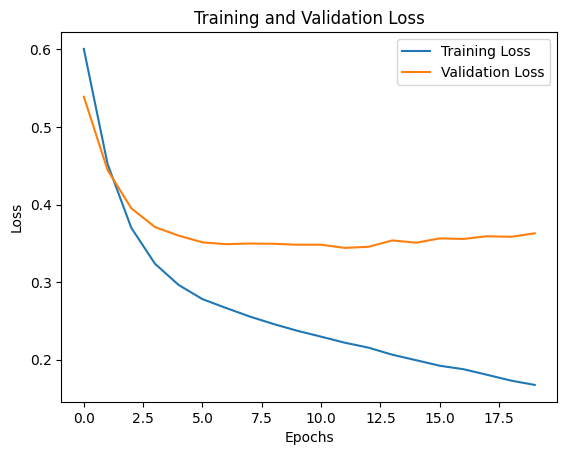

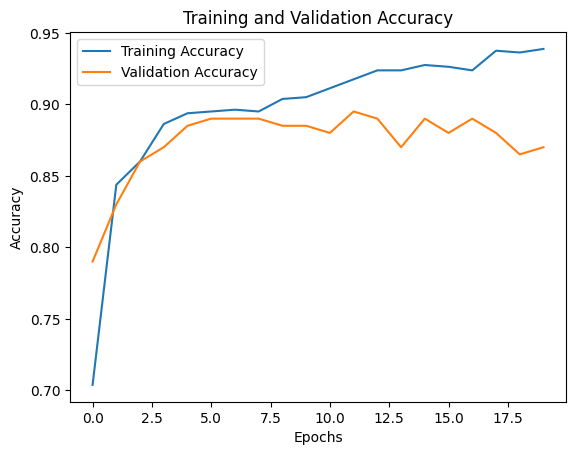

In [2]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
from sklearn.model_selection import train_test_split 
from sklearn.datasets import make_classification 
import numpy as np 

# 1. Tạo dataset giả lập (phân loại nhị phân) 
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42) 

# 2. Chia tập dữ liệu thành train (80%) và validation (20%) 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42) 

# 3. Xây dựng mô hình MLP đơn giản 
model = Sequential() 
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))  # Lớp đầu vào 
model.add(Dense(32, activation='relu'))  # Lớp ẩn 
model.add(Dense(1, activation='sigmoid'))  # Lớp đầu ra cho phân loại nhị phân 

# 4. Compile mô hình 
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) 

# 5. Huấn luyện mô hình với dữ liệu train và validate đồng thời 
history = model.fit( 
X_train, y_train, 
epochs=20,                        
batch_size=32,                    
# Số lượng epoch 
# Kích thước batch 
validation_data=(X_val, y_val),    # Sử dụng tập validation 
verbose=1                         
# Hiển thị chi tiết quá trình huấn luyện 
) 

# 6. Đánh giá mô hình trên tập validation sau huấn luyện 
val_loss, val_accuracy = model.evaluate(X_val, y_val) 
print(f"Validation Loss: {val_loss:.4f}") 
print(f"Validation Accuracy: {val_accuracy:.4f}") 
import matplotlib.pyplot as plt 
# Vẽ đồ thị Loss (mất mát) giữa train và validation 
plt.plot(history.history['loss'], label='Training Loss') 
plt.plot(history.history['val_loss'], label='Validation Loss') 
plt.title('Training and Validation Loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend() 
plt.show() 
# Vẽ đồ thị Accuracy (độ chính xác) giữa train và validation 
plt.plot(history.history['accuracy'], label='Training Accuracy') 
plt.plot(history.history['val_accuracy'], label='Validation Accuracy') 
plt.title('Training and Validation Accuracy') 
plt.xlabel('Epochs') 
plt.ylabel('Accuracy') 
plt.legend() 
plt.show()

Epoch 1/20
22/22 [==============================] - 1s 8ms/step - loss: 0.6508 - accuracy: 0.6357 - val_loss: 0.5635 - val_accuracy: 0.7733
Epoch 2/20
22/22 [==============================] - 0s 3ms/step - loss: 0.5139 - accuracy: 0.8357 - val_loss: 0.4619 - val_accuracy: 0.8000
Epoch 3/20
22/22 [==============================] - 0s 3ms/step - loss: 0.4104 - accuracy: 0.8686 - val_loss: 0.4015 - val_accuracy: 0.8200
Epoch 4/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3428 - accuracy: 0.8800 - val_loss: 0.3677 - val_accuracy: 0.8333
Epoch 5/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3056 - accuracy: 0.8914 - val_loss: 0.3563 - val_accuracy: 0.8333
Epoch 6/20
22/22 [==============================] - 0s 2ms/step - loss: 0.2851 - accuracy: 0.8957 - val_loss: 0.3496 - val_accuracy: 0.8467
Epoch 7/20
22/22 [==============================] - 0s 2ms/step - loss: 0.2730 - accuracy: 0.8986 - val_loss: 0.3455 - val_accuracy: 0.8467
Epoch 8/20
22/22 [==

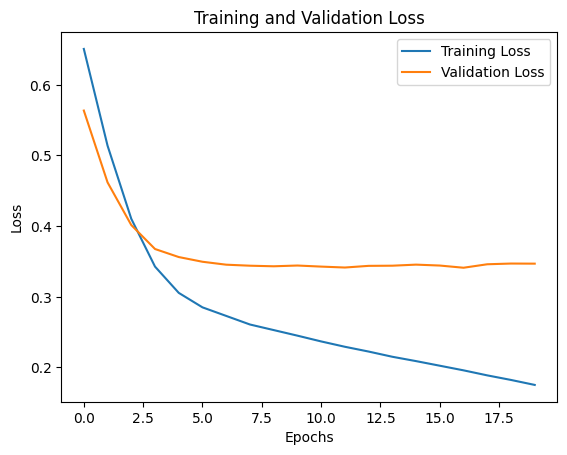

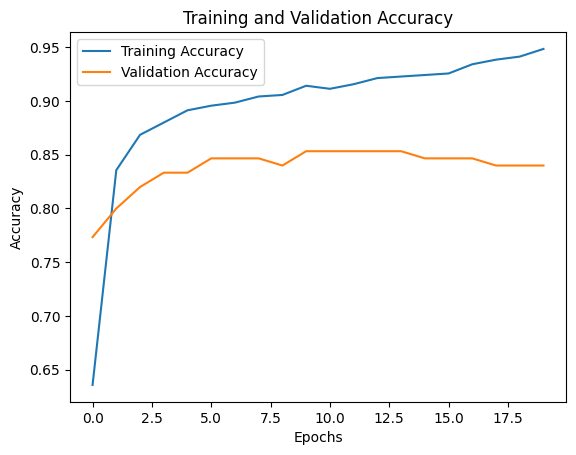

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# 1. Tạo dataset giả lập (phân loại nhị phân)
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# 2. Chia tập dữ liệu thành train (70%), validation (15%) và test (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# 3. Xây dựng mô hình MLP đơn giản
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))  # Lớp đầu vào
model.add(Dense(32, activation='relu'))  # Lớp ẩn
model.add(Dense(1, activation='sigmoid'))  # Lớp đầu ra cho phân loại nhị phân

# 4. Compile mô hình
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 5. Huấn luyện mô hình với dữ liệu train và validate đồng thời
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=1
)

# 6. Đánh giá mô hình trên tập validation sau huấn luyện
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

# 7. Đánh giá mô hình trên tập test
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Chuyển đổi xác suất thành 0 hoặc 1

# Tính MAE, MSE, RMSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Test MAE: {mae:.4f}")
print(f"Test MSE: {mse:.4f}")
print(f"Test RMSE: {rmse:.4f}")

# 8. Vẽ đồ thị Loss giữa train và validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Vẽ đồ thị Accuracy giữa train và validation
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Epoch 1/20
22/22 [==============================] - 1s 10ms/step - loss: 0.6934 - accuracy: 0.5214 - val_loss: 0.6789 - val_accuracy: 0.6867
Epoch 2/20
22/22 [==============================] - 0s 4ms/step - loss: 0.6671 - accuracy: 0.5771 - val_loss: 0.5925 - val_accuracy: 0.7467
Epoch 3/20
22/22 [==============================] - 0s 3ms/step - loss: 0.5561 - accuracy: 0.7229 - val_loss: 0.4461 - val_accuracy: 0.8067
Epoch 4/20
22/22 [==============================] - 0s 3ms/step - loss: 0.4292 - accuracy: 0.8329 - val_loss: 0.4246 - val_accuracy: 0.8267
Epoch 5/20
22/22 [==============================] - 0s 3ms/step - loss: 0.4233 - accuracy: 0.8371 - val_loss: 0.3847 - val_accuracy: 0.8200
Epoch 6/20
22/22 [==============================] - 0s 3ms/step - loss: 0.3471 - accuracy: 0.8814 - val_loss: 0.3917 - val_accuracy: 0.8333
Epoch 7/20
22/22 [==============================] - 0s 3ms/step - loss: 0.3610 - accuracy: 0.8643 - val_loss: 0.3465 - val_accuracy: 0.8600
Epoch 8/20
22/22 [=

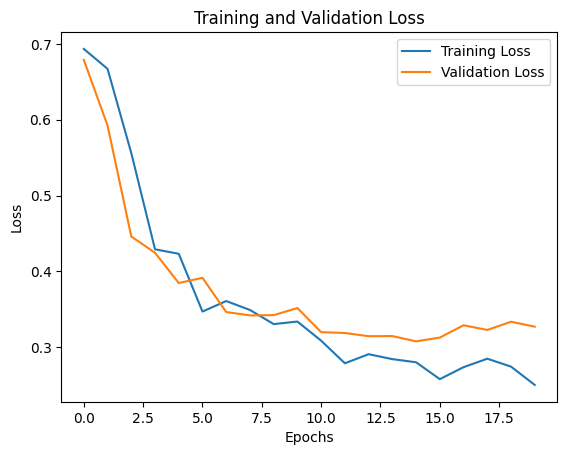

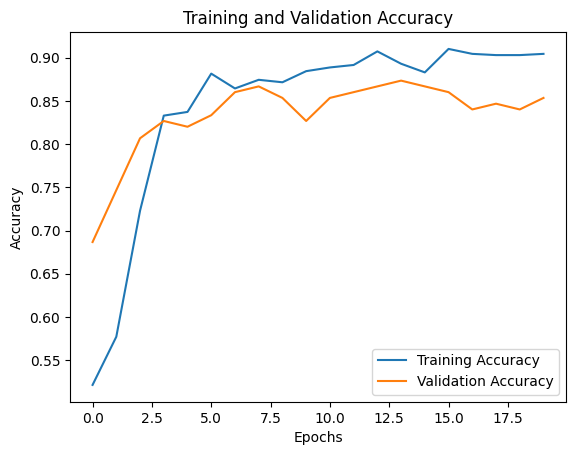

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# 1. Tạo dataset giả lập (phân loại nhị phân)
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# 2. Chia tập dữ liệu thành train (70%), validation (15%) và test (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# 3. Xây dựng mô hình 7_layer với dropout
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(X_train.shape[1],)))  # Lớp đầu vào
model.add(Dropout(0.3))  # Dropout để tránh overfitting

# Thêm 7 lớp ẩn, mỗi lớp với 100 neurons và Dropout
for _ in range(7):
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.3))

# Lớp đầu ra
model.add(Dense(1, activation='sigmoid'))  # Lớp đầu ra cho phân loại nhị phân

# 4. Compile mô hình
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 5. Huấn luyện mô hình với dữ liệu train và validate đồng thời
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=1
)

# 6. Đánh giá mô hình trên tập validation sau huấn luyện
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

# 7. Đánh giá mô hình trên tập test
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Chuyển đổi xác suất thành 0 hoặc 1

# Tính MAE, MSE, RMSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Test MAE: {mae:.4f}")
print(f"Test MSE: {mse:.4f}")
print(f"Test RMSE: {rmse:.4f}")

# 8. Vẽ đồ thị Loss giữa train và validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Vẽ đồ thị Accuracy giữa train và validation
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Epoch 1/20
22/22 [==============================] - 1s 10ms/step - loss: 0.6271 - accuracy: 0.6371 - val_loss: 0.5099 - val_accuracy: 0.7733
Epoch 2/20
22/22 [==============================] - 0s 4ms/step - loss: 0.4613 - accuracy: 0.8057 - val_loss: 0.4235 - val_accuracy: 0.8133
Epoch 3/20
22/22 [==============================] - 0s 4ms/step - loss: 0.3872 - accuracy: 0.8429 - val_loss: 0.3837 - val_accuracy: 0.8133
Epoch 4/20
22/22 [==============================] - 0s 4ms/step - loss: 0.3355 - accuracy: 0.8757 - val_loss: 0.3683 - val_accuracy: 0.8267
Epoch 5/20
22/22 [==============================] - 0s 4ms/step - loss: 0.3144 - accuracy: 0.8829 - val_loss: 0.3724 - val_accuracy: 0.8467
Epoch 6/20
22/22 [==============================] - 0s 4ms/step - loss: 0.2849 - accuracy: 0.9014 - val_loss: 0.3518 - val_accuracy: 0.8400
Epoch 7/20
22/22 [==============================] - 0s 4ms/step - loss: 0.2850 - accuracy: 0.8886 - val_loss: 0.3552 - val_accuracy: 0.8533
Epoch 8/20
22/22 [=

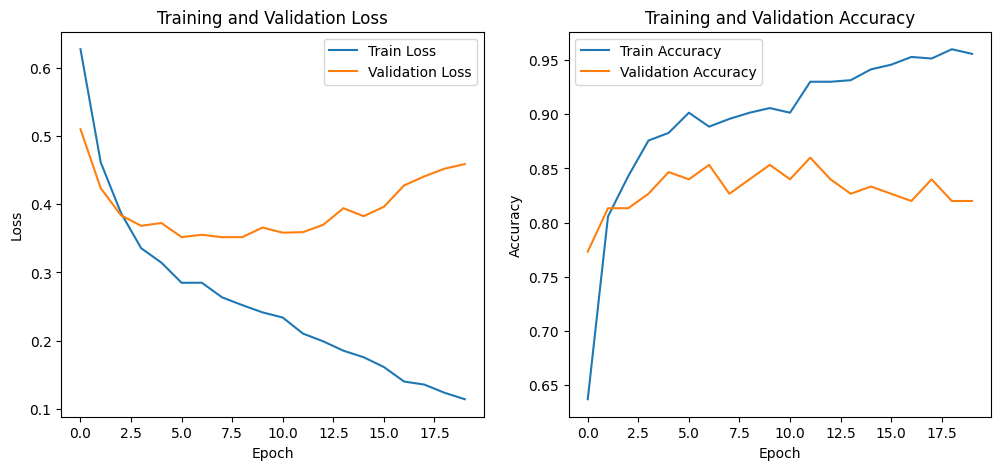

In [9]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten

# Xây dựng mô hình CNN
cnn_model = Sequential()
cnn_model.add(Conv1D(100, 3, activation='relu', input_shape=(X_train.shape[1], 1)))
cnn_model.add(MaxPooling1D(2))
cnn_model.add(Conv1D(100, 3, activation='relu'))
cnn_model.add(MaxPooling1D(2))
cnn_model.add(Flatten())
cnn_model.add(Dense(100, activation='relu'))
cnn_model.add(Dropout(0.3))
cnn_model.add(Dense(1, activation='sigmoid'))

# Compile mô hình
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Huấn luyện mô hình CNN
cnn_history = cnn_model.fit(X_train[..., np.newaxis], y_train, epochs=20, batch_size=32,
                            validation_data=(X_val[..., np.newaxis], y_val), verbose=1)

# Đánh giá mô hình CNN
cnn_val_loss, cnn_val_accuracy = cnn_model.evaluate(X_val[..., np.newaxis], y_val)
print(f"Validation Loss (CNN): {cnn_val_loss:.4f}")
print(f"Validation Accuracy (CNN): {cnn_val_accuracy:.4f}")

# Dự đoán và tính toán MAE, MSE, RMSE cho mô hình CNN
cnn_y_pred = (cnn_model.predict(X_test[..., np.newaxis]) > 0.5).astype(int)
cnn_mae = mean_absolute_error(y_test, cnn_y_pred)
cnn_mse = mean_squared_error(y_test, cnn_y_pred)
cnn_rmse = np.sqrt(cnn_mse)

# Lấy lịch sử huấn luyện
history = cnn_history.history

# Vẽ đồ thị Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history['loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Vẽ đồ thị Accuracy
plt.subplot(1, 2, 2)
plt.plot(history['accuracy'], label='Train Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


Epoch 1/20
22/22 [==============================] - 4s 39ms/step - loss: 0.5143 - accuracy: 0.7429 - val_loss: 0.4472 - val_accuracy: 0.8400
Epoch 2/20
22/22 [==============================] - 0s 13ms/step - loss: 0.3518 - accuracy: 0.8643 - val_loss: 0.3642 - val_accuracy: 0.8133
Epoch 3/20
22/22 [==============================] - 0s 13ms/step - loss: 0.3098 - accuracy: 0.8671 - val_loss: 0.3600 - val_accuracy: 0.8533
Epoch 4/20
22/22 [==============================] - 0s 12ms/step - loss: 0.2848 - accuracy: 0.8871 - val_loss: 0.3852 - val_accuracy: 0.8667
Epoch 5/20
22/22 [==============================] - 0s 13ms/step - loss: 0.2613 - accuracy: 0.8971 - val_loss: 0.3904 - val_accuracy: 0.8333
Epoch 6/20
22/22 [==============================] - 0s 13ms/step - loss: 0.2256 - accuracy: 0.9029 - val_loss: 0.3780 - val_accuracy: 0.8600
Epoch 7/20
22/22 [==============================] - 0s 13ms/step - loss: 0.2330 - accuracy: 0.9129 - val_loss: 0.3965 - val_accuracy: 0.8267
Epoch 8/20
22

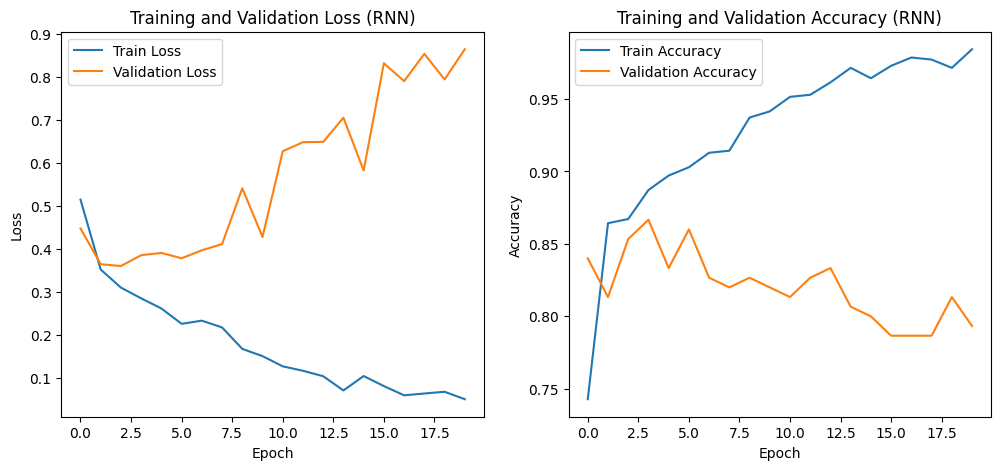

In [10]:
from tensorflow.keras.layers import SimpleRNN

# Xây dựng mô hình RNN
rnn_model = Sequential()
rnn_model.add(SimpleRNN(100, activation='relu', input_shape=(X_train.shape[1], 1), return_sequences=True))
for _ in range(4):
    rnn_model.add(SimpleRNN(100, activation='relu', return_sequences=True))
rnn_model.add(Flatten())
rnn_model.add(Dense(1, activation='sigmoid'))

# Compile mô hình
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Huấn luyện mô hình RNN
rnn_history = rnn_model.fit(X_train[..., np.newaxis], y_train, epochs=20, batch_size=32,
                            validation_data=(X_val[..., np.newaxis], y_val), verbose=1)

# Đánh giá mô hình RNN
rnn_val_loss, rnn_val_accuracy = rnn_model.evaluate(X_val[..., np.newaxis], y_val)
print(f"Validation Loss (RNN): {rnn_val_loss:.4f}")
print(f"Validation Accuracy (RNN): {rnn_val_accuracy:.4f}")

# Dự đoán và tính toán MAE, MSE, RMSE cho mô hình RNN
rnn_y_pred = (rnn_model.predict(X_test[..., np.newaxis]) > 0.5).astype(int)
rnn_mae = mean_absolute_error(y_test, rnn_y_pred)
rnn_mse = mean_squared_error(y_test, rnn_y_pred)
rnn_rmse = np.sqrt(rnn_mse)

# Lấy lịch sử huấn luyện của mô hình RNN
rnn_history_data = rnn_history.history

# Vẽ đồ thị Loss cho mô hình RNN
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(rnn_history_data['loss'], label='Train Loss')
plt.plot(rnn_history_data['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss (RNN)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Vẽ đồ thị Accuracy cho mô hình RNN
plt.subplot(1, 2, 2)
plt.plot(rnn_history_data['accuracy'], label='Train Accuracy')
plt.plot(rnn_history_data['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy (RNN)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Epoch 1/20
22/22 [==============================] - 6s 81ms/step - loss: 0.6931 - accuracy: 0.4986 - val_loss: 0.6912 - val_accuracy: 0.6067
Epoch 2/20
22/22 [==============================] - 1s 48ms/step - loss: 0.6841 - accuracy: 0.5657 - val_loss: 0.6850 - val_accuracy: 0.6000
Epoch 3/20
22/22 [==============================] - 1s 49ms/step - loss: 0.6908 - accuracy: 0.5943 - val_loss: 0.6754 - val_accuracy: 0.6533
Epoch 4/20
22/22 [==============================] - 1s 49ms/step - loss: 0.6728 - accuracy: 0.6114 - val_loss: 0.6360 - val_accuracy: 0.6600
Epoch 5/20
22/22 [==============================] - 1s 49ms/step - loss: 0.6491 - accuracy: 0.6186 - val_loss: 0.6244 - val_accuracy: 0.6933
Epoch 6/20
22/22 [==============================] - 1s 50ms/step - loss: 0.6369 - accuracy: 0.6329 - val_loss: 0.6044 - val_accuracy: 0.6933
Epoch 7/20
22/22 [==============================] - 1s 49ms/step - loss: 0.6252 - accuracy: 0.6514 - val_loss: 0.5801 - val_accuracy: 0.7000
Epoch 8/20
22

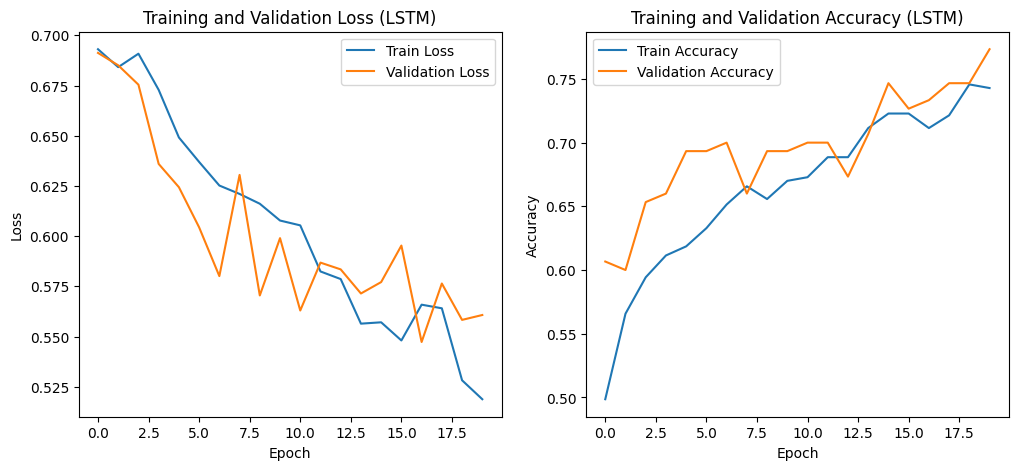

In [11]:
from tensorflow.keras.layers import LSTM

# Xây dựng mô hình LSTM
lstm_model = Sequential()
lstm_model.add(LSTM(100, activation='relu', input_shape=(X_train.shape[1], 1), return_sequences=True))
for _ in range(4):
    lstm_model.add(LSTM(100, activation='relu', return_sequences=True))
lstm_model.add(Flatten())
lstm_model.add(Dense(1, activation='sigmoid'))

# Compile mô hình
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Huấn luyện mô hình LSTM
lstm_history = lstm_model.fit(X_train[..., np.newaxis], y_train, epochs=20, batch_size=32,
                              validation_data=(X_val[..., np.newaxis], y_val), verbose=1)

# Đánh giá mô hình LSTM
lstm_val_loss, lstm_val_accuracy = lstm_model.evaluate(X_val[..., np.newaxis], y_val)
print(f"Validation Loss (LSTM): {lstm_val_loss:.4f}")
print(f"Validation Accuracy (LSTM): {lstm_val_accuracy:.4f}")

# Dự đoán và tính toán MAE, MSE, RMSE cho mô hình LSTM
lstm_y_pred = (lstm_model.predict(X_test[..., np.newaxis]) > 0.5).astype(int)
lstm_mae = mean_absolute_error(y_test, lstm_y_pred)
lstm_mse = mean_squared_error(y_test, lstm_y_pred)
lstm_rmse = np.sqrt(lstm_mse)

# Lấy lịch sử huấn luyện của mô hình LSTM
lstm_history_data = lstm_history.history

# Vẽ đồ thị Loss cho mô hình LSTM
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(lstm_history_data['loss'], label='Train Loss')
plt.plot(lstm_history_data['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss (LSTM)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Vẽ đồ thị Accuracy cho mô hình LSTM
plt.subplot(1, 2, 2)
plt.plot(lstm_history_data['accuracy'], label='Train Accuracy')
plt.plot(lstm_history_data['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy (LSTM)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

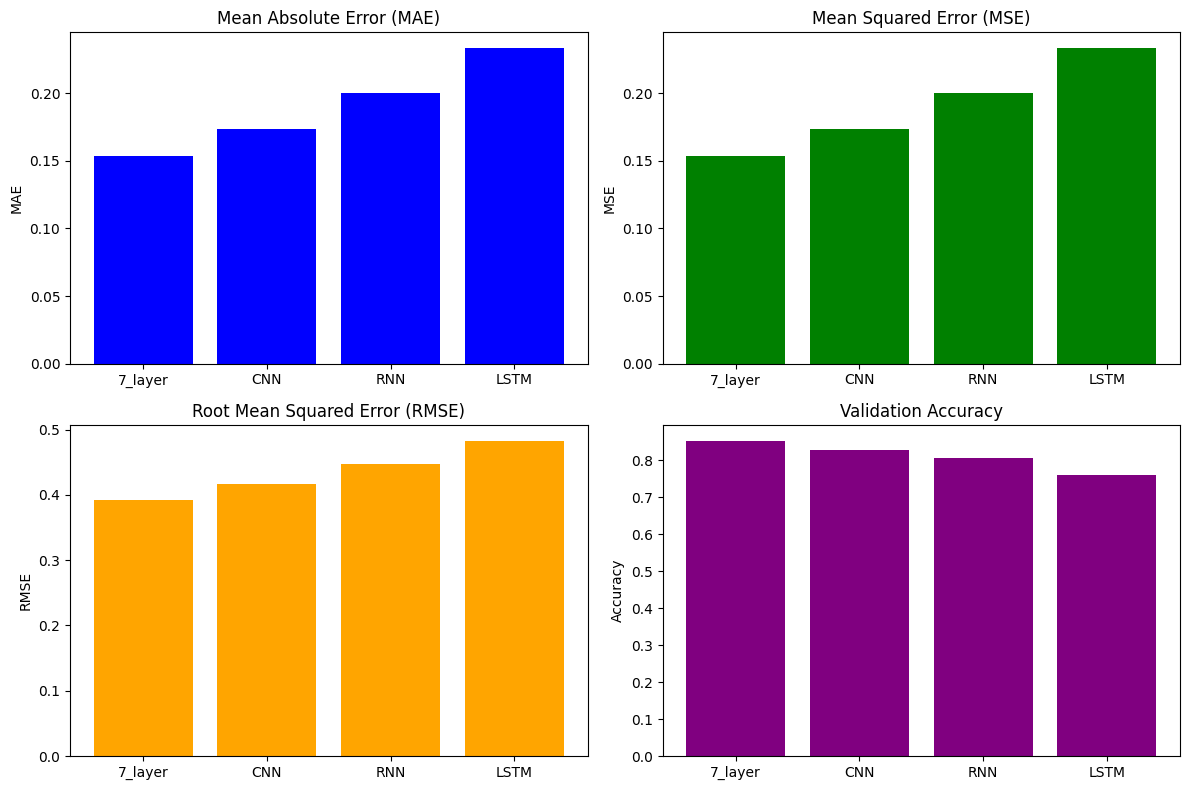

In [8]:
import matplotlib.pyplot as plt

# Các giá trị đã tính toán cho các mô hình
mae_values = [mae, cnn_mae, rnn_mae, lstm_mae]
mse_values = [mse, cnn_mse, rnn_mse, lstm_mse]
rmse_values = [rmse, cnn_rmse, rnn_rmse, lstm_rmse]
val_accuracy_values = [val_accuracy, cnn_val_accuracy, rnn_val_accuracy, lstm_val_accuracy]

model_names = ['7_layer', 'CNN', 'RNN', 'LSTM']

# Vẽ biểu đồ MAE
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.bar(model_names, mae_values, color='blue')
plt.title('Mean Absolute Error (MAE)')
plt.ylabel('MAE')

# Vẽ biểu đồ MSE
plt.subplot(2, 2, 2)
plt.bar(model_names, mse_values, color='green')
plt.title('Mean Squared Error (MSE)')
plt.ylabel('MSE')

# Vẽ biểu đồ RMSE
plt.subplot(2, 2, 3)
plt.bar(model_names, rmse_values, color='orange')
plt.title('Root Mean Squared Error (RMSE)')
plt.ylabel('RMSE')

# Vẽ biểu đồ độ chính xác trên tập validation
plt.subplot(2, 2, 4)
plt.bar(model_names, val_accuracy_values, color='purple')
plt.title('Validation Accuracy')
plt.ylabel('Accuracy')

# Điều chỉnh bố cục của các biểu đồ
plt.tight_layout()
plt.show()
